<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozoSemin%C3%A1rio1_V_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

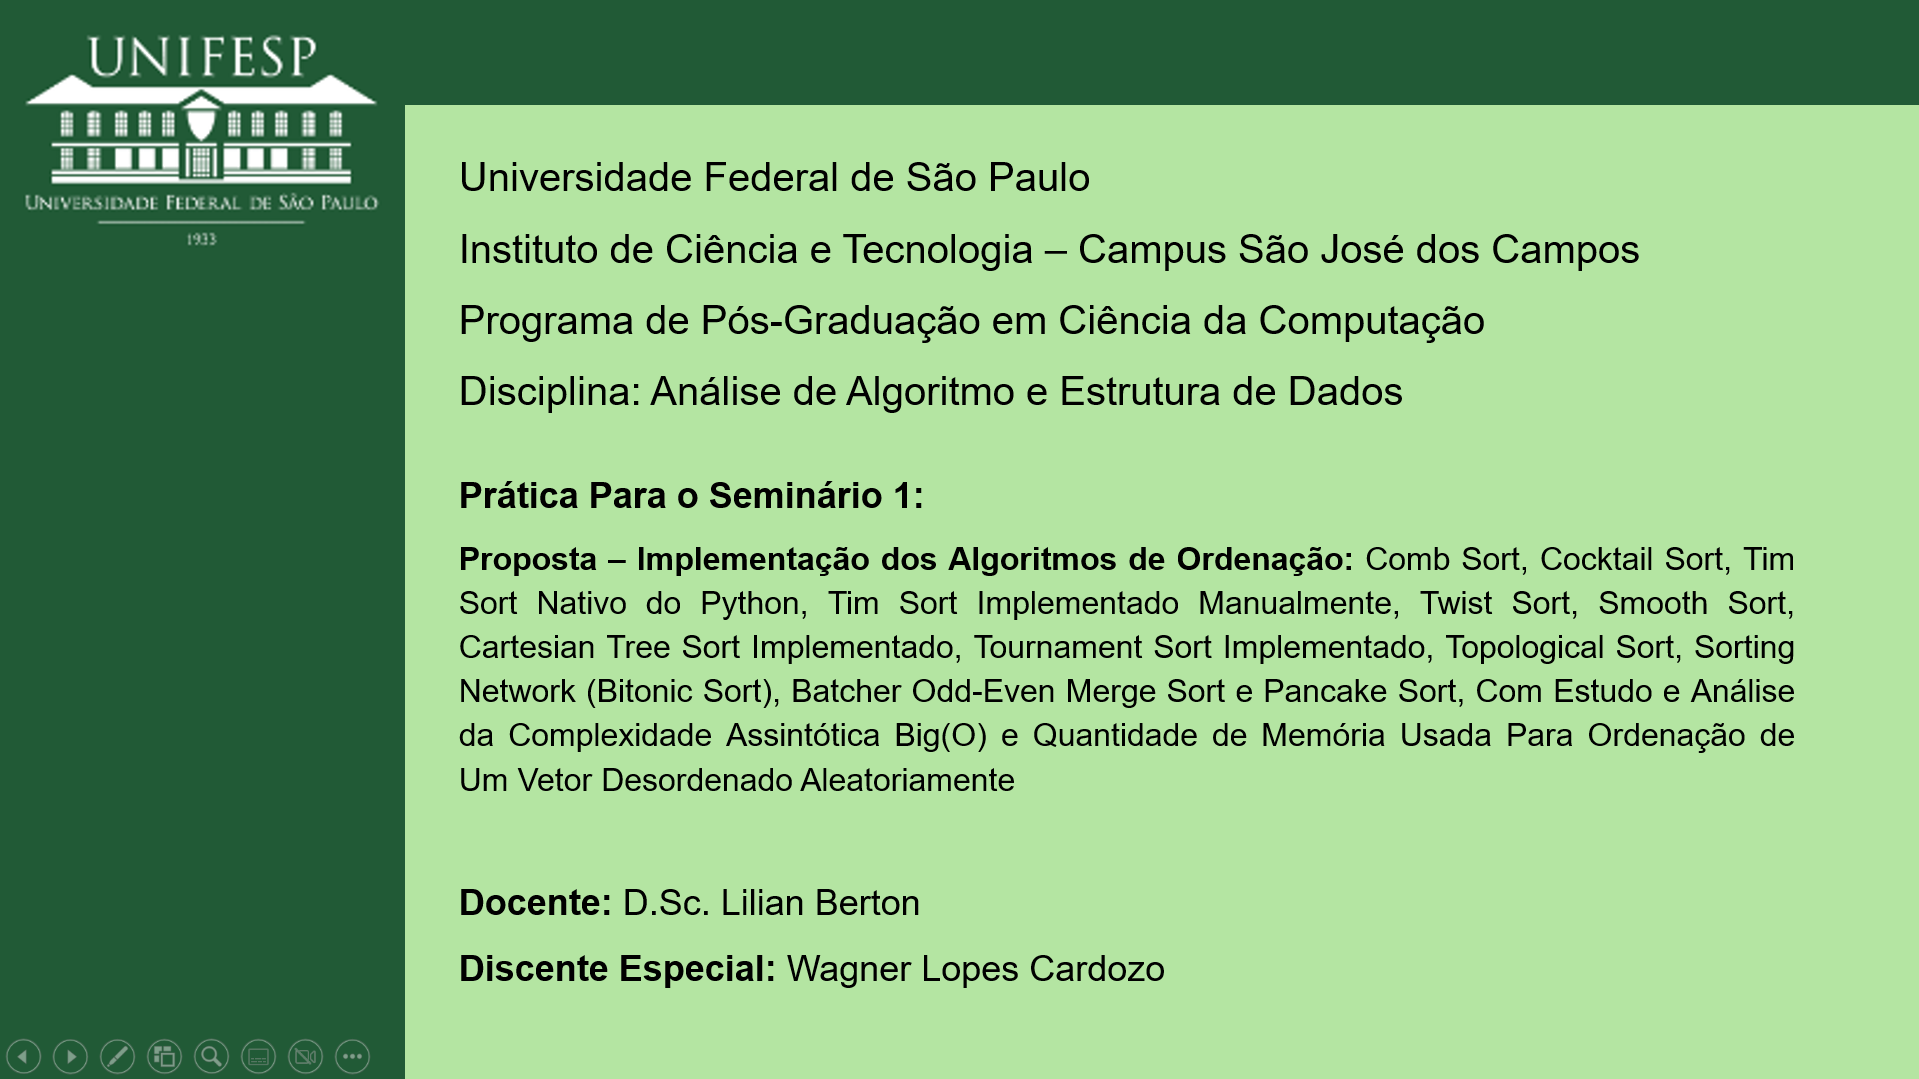

#<font color=lightgreen>Instalando as Biblotecas do Python

In [ ]:
!pip install tabulate
!pip install psutil
!pip install pandas
!pip install pandas openpyxl

#<font color=lightgreen>Implementação do Algoritmo

#<font color=lightgreen>Introdução

##Este algoritmo reúne vários algoritmos de ordenação que são:

* Comb Sort                   
* Cocktail Sort
* Tim Sort Nativo   
* Tim Sort Manual     
* Twist Sort     
* Smooth Sort   
* Cartesian Tree Sort  
* Tournament Sort       
* Topological Sort    
* Sorting Network     
* Batcher Odd-Even Merge Sort

##Sendo um estudo que tem por objetivo comparar assintoticamente o desempenho desses algoritmos, por meio da comparação do tempo gasto para ordenar um determinado vetor de forma crescente e decrescente, desordenado aleatoriamente, com a quantidade de elementos do vetor escolhida pelo usuário por meio de uma simples interação front-end com o usuário no ambiente de desenvolvimento integrado IDE do Google Colab.

#<font color=lightgreen>Resultados

##Os resultados para cada ordenação do vetor crescente e decrescente, usando cada método, são exibidos na tela conforme for terminando o processamento de cada algoritmo de ordenação, exibindo os 10 primeiros elementos e os 10 últimos elementos do vetor ordenado de forma crescente e decrescente, bem como também o resultado do tempo gasto pelo algoritmo de ordenação e memória usada para ordenar, referente a cada método de ordenação sucessivamente.

##É perguntado ao usuário se deseja escolher outro vetor e quantos elementos deseja colocar neste novo vetor, mas se o usuário escolher encerrar o algoritmo, é perguntado se deseja salvar as informações da sumarização em forma de tabela num arquivo .XLMS do Excel e, em seguida, depois de salvo a tabela no processamento em nuvem do Google Colab, o algoritmo é encerrado.

In [ ]:
from collections import defaultdict
import random
import time
import psutil
import os
from tabulate import tabulate
import pandas as pd

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# ******************************** Funções de ordenação ***********************************
                                                                        # As 11 funções contando a partir desta contendo o Cocktail Sort representa cada uma
# Comb Sort                                                             # um algoritmo de ordenação
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while not sorted:
        gap = int(gap // shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        for i in range(len(arr) - gap):                      # Pior caso: O(n^2)
                                                             # Explicação: Apesar de reduzir o gap, Comb Sort ainda se comporta de maneira semelhante ao Bubble Sort no pior caso.
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr
# ******************************************************************************************
# Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False                                          # Pior caso: O(n^2)
                                                                 # Explicação: Assim como o Bubble Sort, o Cocktail Sort precisa verificar e trocar elementos, resultando em uma complexidade quadrática.
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start = start + 1
    return arr
# **************************************************************************************
# Tim Sort (Nativo)
def tim_sort_native(arr):                         # Pior caso: O(n log n)
                                                  # Explicação: Tim Sort é um algoritmo híbrido que combina Merge Sort e Insertion Sort, garantindo a eficiência em O(n log n) no pior caso.
    return sorted(arr)
# **************************************************************************************
# Tim Sort (Manual)
def tim_sort_manual(arr):
    min_run = 32

    def insertion_sort(arr, left, right):                    # Pior caso (insertion_sort): O(n^2)
        for i in range(left + 1, right + 1):                 # Explicação: Insertion Sort é quadrático em seu comportamento no pior caso.
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):                   # Pior caso (merge): O(n)
        len1, len2 = m - l + 1, r - m          # Explicação: A função de merge precisa combinar subarrays ordenados, o que leva tempo linear no pior caso.
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    n = len(arr)
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run                                            # Pior caso (Tim Sort): O(n log n)
    while size < n:                                           # Explicação: A divisão e conquista do Merge Sort mantém a eficiência de O(n log n), mesmo com subarrays menores tratados por Insertion Sort.
        for left in range(0, n, 2 * size):
            mid = min((n - 1), (left + size - 1))
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
    return arr
# **************************************************************************************
# Twist Sort
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left < right:
            pivot = arr[right]
            i = left - 1
            for j in range(left, right):
                if arr[j] < pivot:
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[right] = arr[right], arr[i + 1]          # Pior caso: O(n^2)
            twist_sort_recursive(arr, left, i)                       # Explicação: Similar ao Quick Sort, o pior caso ocorre quando o pivô escolhido resulta em partições desbalanceadas.
            twist_sort_recursive(arr, i + 2, right)

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr
# ***************************************************************************************
# Smooth Sort
def smooth_sort(arr):
    def sift(arr, i, size):
        child = 2 * i + 1
        while child < size:
            if child + 1 < size and arr[child] < arr[child + 1]:
                child += 1
            if arr[i] >= arr[child]:
                break
            arr[i], arr[child] = arr[child], arr[i]
            i, child = child, 2 * child + 1

    def heapify(arr):
        size = len(arr)
        for i in range(size // 2 - 1, -1, -1):
            sift(arr, i, size)

    def smooth(arr):
        heapify(arr)
        size = len(arr)                                  # Pior caso: O(n log n)
        for i in range(size - 1, 0, -1):                 # Explicação: A estrutura de heap usada no Smooth Sort garante eficiência de O(n log n) ao organizar e remover os maiores elementos.
            arr[i], arr[0] = arr[0], arr[i]
            sift(arr, 0, i)

    smooth(arr)
    return arr
# **************************************************************************************
# Cartesian Tree Sort
def cartesian_tree_sort(arr):
    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

    def insert(root, value):
        if root is None:
            return Node(value)
        if value < root.value:
            root.left = insert(root.left, value)
        else:
            root.right = insert(root.right, value)
        return root

    def in_order_traversal(root, sorted_arr):
        if root is not None:
            in_order_traversal(root.left, sorted_arr)
            sorted_arr.append(root.value)
            in_order_traversal(root.right, sorted_arr)

    root = None
    for value in arr:
        root = insert(root, value)

    sorted_arr = []
    in_order_traversal(root, sorted_arr)              # Pior caso: O(n^2)
    return sorted_arr                                 # Explicação: O pior caso ocorre quando a árvore se degenera para uma lista ligada (ex. uma lista ordenada).
# **************************************************************************************
# Tournament Sort
def tournament_sort(arr):
    def build_tree(arr):
        tree = [[(value, i) for i, value in enumerate(arr)]]
        while len(tree[-1]) > 1:
            new_layer = []
            for i in range(0, len(tree[-1]), 2):
                if i + 1 < len(tree[-1]):
                    winner = min(tree[-1][i], tree[-1][i + 1])
                    new_layer.append(winner)
                else:
                    new_layer.append(tree[-1][i])
            tree.append(new_layer)
        return tree

    def tournament(arr):
        sorted_arr = []
        while arr:
            tree = build_tree(arr)
            winner = tree[-1][0][1]
            sorted_arr.append(arr[winner])
            arr.pop(winner)
        return sorted_arr
                                                    # Pior caso: O(n log n)
    return tournament(arr)                          # Explicação: O processo de construção da árvore de torneio e remoção dos elementos é logarítmico, garantindo eficiência O(n log n).
# **************************************************************************************
# Topological Sort
def topological_sort(arr):
    from collections import defaultdict

    def topological_sort_util(v, visited, stack, graph):
        visited[v] = True
        for i in graph[v]:                                             # Pior caso: O(V + E), onde V é o número de vértices (elementos no array) e E é o número de arestas (relações de dependência entre os elementos)
            if not visited[i]:                                         # Explicação: A complexidade de tempo neste pior caso é O(V + E), onde V é o número de vértices (elementos no array) e E é o número de arestas (relações de dependência entre os elementos).
                topological_sort_util(i, visited, stack, graph)        # Explicação Continuação: no pior caso, ela percorre todas as arestas do grafo para cada nó. Se o grafo for uma cadeia linear, esse laço será executado E vezes, onde E pode ser próximo de n - 1 (no pior caso em um grafo de tamanho n).
        stack.append(v)                                                # ???????????????? ACHO QUE É ISSo ?????????????????????????????????????????

    n = len(arr)
    index_map = {val: idx for idx, val in enumerate(sorted(set(arr)))}
    graph = defaultdict(list)

    for i in range(n - 1):
        if index_map[arr[i]] < index_map[arr[i + 1]]:
            graph[index_map[arr[i]]].append(index_map[arr[i + 1]])

    visited = [False] * len(index_map)
    stack = []

    for i in range(len(index_map)):
        if not visited[i]:
            topological_sort_util(i, visited, stack, graph)

    sorted_indices = [i for i in reversed(stack)]
    return [list(index_map.keys())[i] for i in sorted_indices]
# *******************************************************************************************
# Sorting Network
def sorting_network(arr):
    def swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def bitonic_merge(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            for i in range(low, low + k):
                if direction == (arr[i] > arr[i + k]):
                    arr[i], arr[i + k] = arr[i + k], arr[i]
            bitonic_merge(arr, low, k, direction)
            bitonic_merge(arr, low + k, k, direction)

    def bitonic_sort(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            bitonic_sort(arr, low, k, True)
            bitonic_sort(arr, low + k, k, False)
            bitonic_merge(arr, low, cnt, direction)

    bitonic_sort(arr, 0, len(arr), True)                   # Pior caso: O(n log^2 n)
    return arr                                             # Explicação: Redes de ordenação geralmente têm complexidade O(n log^2 n) devido à forma de divisão e conquistas nas comparações.
# ********************************************************************************************
# Batcher Odd-Even Merge Sort
def batcher_odd_even_merge_sort(arr):
    def merge(arr, low, mid, high):
        left = arr[low:mid]
        right = arr[mid:high]
        i = j = 0
        for k in range(low, high):
            if i < len(left) and (j >= len(right) or left[i] <= right[j]):
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1

    def batcher_sort(arr, low, high):
        if high - low > 1:
            mid = (low + high) // 2
            batcher_sort(arr, low, mid)
            batcher_sort(arr, mid, high)
            merge(arr, low, mid, high)

    batcher_sort(arr, 0, len(arr))
    return arr
# *********************************************************************************************************************************
# Função principal
def main():                                                                                       # Esta função tem toda a formatação dos resultados exibido na tela, bem como também
    while True:                                                                                   # a formatação da interação do algoritmo com o usuário por meio de um front-end simple
        # Solicitar o tamanho do vetor                                                            # dentro da IDE do Google Colab permitindo o usuário escolher a quantidade de
        try:                                                                                      # elementos para o vetor desordenado aleatoriamente e se o usuário deseja encerrar
            size = int(input("Digite a quantidade de elementos do vetor (até 1.000.000): "))      # o algoritmo e deseja salvar as informaçõe de tempo e memória para ordenação em um
            if size < 1 or size > 1000000:                                                        # arquivo .xlms do Excel
                print("Por favor, digite um número entre 1 e 1.000.000.")
                continue
        except ValueError:
            print("Entrada inválida. Digite um número inteiro.")
            continue

        # Gerar vetor aleatório
        arr = [random.randint(1, 1000000) for _ in range(size)]
        print(f"Vetor de {size} elementos gerado.")

        # Armazenar resultados
        results = defaultdict(lambda: {'crescente': {'tempo': 0, 'memoria': 0}, 'decrescente': {'tempo': 0, 'memoria': 0}})

        # Funções de ordenação e suas chamadas
        sorting_algorithms = {
            'Comb Sort': comb_sort,
            'Cocktail Sort': cocktail_sort,
            'Tim Sort Nativo': tim_sort_native,
            'Tim Sort Manual': tim_sort_manual,
            'Twist Sort': twist_sort,
            'Smooth Sort': smooth_sort,
            'Cartesian Tree Sort': cartesian_tree_sort,
            'Tournament Sort': tournament_sort,
            'Topological Sort': topological_sort,
            'Sorting Network': sorting_network,
            'Batcher Odd-Even Merge Sort': batcher_odd_even_merge_sort
        }

        for name, sort_func in sorting_algorithms.items():
            print(f"\nMétodo: {name}")

            # Ordenar crescente
            arr_crescente = arr.copy()
            start_time = time.time()
            start_memory = memory_usage_psutil()
            sorted_crescente = sort_func(arr_crescente)
            end_memory = memory_usage_psutil()
            end_time = time.time()

            results[name]['crescente']['tempo'] = end_time - start_time
            results[name]['crescente']['memoria'] = end_memory - start_memory

            print(f"\nVetor ordenado crescentemente ({name}):")
            print(sorted_crescente[:10])  # Exibe os primeiros 10 elementos
            print("...")
            print(sorted_crescente[-10:])  # Exibe os últimos 10 elementos
            print(f"Tempo gasto para ordenar de forma crescente: {results[name]['crescente']['tempo']:.6f} segundos")
            print(f"Memória usada para ordenar de forma crescente: {results[name]['crescente']['memoria']} bytes")

            # Ordenar decrescente
            arr_decrescente = arr.copy()
            start_time = time.time()
            start_memory = memory_usage_psutil()
            sorted_decrescente = sort_func(arr_decrescente[::-1])[::-1]
            end_memory = memory_usage_psutil()
            end_time = time.time()

            results[name]['decrescente']['tempo'] = end_time - start_time
            results[name]['decrescente']['memoria'] = end_memory - start_memory

            print(f"\nVetor ordenado decrescentemente ({name}):")
            print(sorted_decrescente[:10])  # Exibe os primeiros 10 elementos
            print("...")
            print(sorted_decrescente[-10:])  # Exibe os últimos 10 elementos
            print(f"Tempo gasto para ordenar de forma decrescente: {results[name]['decrescente']['tempo']:.6f} segundos")
            print(f"Memória usada para ordenar de forma decrescente: {results[name]['decrescente']['memoria']} bytes")

        # Exibir Tabela Resumo
        summary_table = []
        for method, stats in results.items():
            summary_table.append([
                method,
                f"{stats['crescente']['tempo']:.6f} s", f"{stats['crescente']['memoria']} bytes",
                f"{stats['decrescente']['tempo']:.6f} s", f"{stats['decrescente']['memoria']} bytes"
            ])

        headers = ["Método", "Tempo Crescente", "Memória Crescente", "Tempo Decrescente", "Memória Decrescente"]
        print("\nTabela Resumo:")
        print(tabulate(summary_table, headers=headers, tablefmt="grid"))

        # Perguntar se o usuário deseja salvar os resultados em um arquivo Excel
        choice = input("\nDeseja salvar os resultados em um arquivo Excel? (s/n): ").strip().lower()
        if choice == 's':
            df = pd.DataFrame(summary_table, columns=headers)
            df.to_excel("tabela_resumo.xlsx", index=False)
            print("Resultados salvos em 'tabela_resumo.xlsx'.")

        # Perguntar se o usuário deseja criar outro vetor ou encerrar
        choice = input("\nDeseja criar outro vetor? (s/n): ").strip().lower()
        if choice != 's':
            print("Muito Obrigado e Bons Estudos")
            break

if __name__ == "__main__":
    main()

Digite a quantidade de elementos do vetor (até 1.000.000): 50000
Vetor de 50000 elementos gerado.

Método: Comb Sort

Vetor ordenado crescentemente (Comb Sort):
[59, 80, 120, 120, 139, 177, 231, 239, 247, 268]
...
[999763, 999773, 999791, 999801, 999809, 999921, 999953, 999972, 999984, 999998]
Tempo gasto para ordenar de forma crescente: 0.387466 segundos
Memória usada para ordenar de forma crescente: 0 bytes

Vetor ordenado decrescentemente (Comb Sort):
[999998, 999984, 999972, 999953, 999921, 999809, 999801, 999791, 999773, 999763]
...
[268, 247, 239, 231, 177, 139, 120, 120, 80, 59]
Tempo gasto para ordenar de forma decrescente: 0.377598 segundos
Memória usada para ordenar de forma decrescente: 811008 bytes

Método: Cocktail Sort

Vetor ordenado crescentemente (Cocktail Sort):
[59, 80, 120, 120, 139, 177, 231, 239, 247, 268]
...
[999763, 999773, 999791, 999801, 999809, 999921, 999953, 999972, 999984, 999998]
Tempo gasto para ordenar de forma crescente: 269.458558 segundos
Memória us

#<font color=lightgreen>Recursos Computacionais

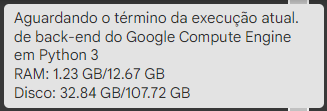

#<font color=lightgreen>Referência Bibliográfica

* CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

* ZIVIANI, N., Projetos de Algoritmos com Implementação e Java e C++, Cengage Learning, 2006

* Espaço do Conhecimento UFMG, Ada Lovelace: A Primeira Programadaora da História, 11 julho 2023, https://www.ufmg.br/espacodoconhecimento/ada-lovelace-a-primeira-programadora-da-historia/

* TAPES G., Por que a matemática é essencial para a programação?, https://www.tabnews.com.br/gabrielTapes/por-que-a-matematica-e-essencial-para-a-programacao

* FEOFILOFF, P. Minicurso de Análise de Algoritmos, 2010, http://www.ime.usp.br/~pf/livrinho-AA/

* GOODRICH M. T., TAMASSIA R., GOLDWASSER M. H., Data Structures and Algorithms in Python, 2013

* Growing with the web, Comb Sort, https://www.growingwiththeweb.com/2016/09/comb-sort.html

* Growing with the web, Cocktail sort, https://www.growingwiththeweb.com/2016/04/cocktail-sort.html

* Geeks for Geeks, Tim Sort, https://www.geeksforgeeks.org/timsort/

* Técnicas de Ordenação, Tim Sort Nativo Python, https://docs.python.org/pt-br/dev/howto/sorting.html

* Geeks for Geeks, Smooth Sort, https://www.geeksforgeeks.org/introduction-to-smooth-sort/?ref=header_outind

* Geeks for Geeks, Cartesian Tree Sort, https://www.geeksforgeeks.org/cartesian-tree-sorting/

* OI Wiki competitive programming, Tournament Sort, https://en.oi-wiki.org/basic/tournament-sort/

* Geeks for Geeks, Pancake Sort, https://www.geeksforgeeks.org/pancake-sorting-in-python/

* Chat GPT, Método Twist Sort (Método de ordenação experiemntal que combina Quick Sort e Cocktail Sort)

* Geeks for Gueeks, Topological Sort, https://www.geeksforgeeks.org/python-program-for-topological-sorting/

* Stack Overflow, Topological Sorthttps://stackoverflow.com/questions/47192626/deceptively-simple-implementation-of-topological-sorting-in-python

* Geeks for Geeks, Topological Sort, https://www.geeksforgeeks.org/topological-sorting/

* PETERSEN F., Sorting Network, https://github.com/Felix-Petersen/diffsort/blob/main/diffsort/networks.py

* Stack Overflow, Batcher Odd-Even Merge Sort, https://stackoverflow.com/questions/33320414/optimal-batcher-odd-even-merge-networks-for-sizes-different-than-2n
